In [1]:
import numpy as np
from matplotlib import pyplot as plt
values = np.zeros((117, 24))
values[:, 10:12] = 1

In [2]:
x = np.linspace(-20, 20, 401, dtype=np.float)
y = np.linspace(20, -20, 401, dtype=np.float)
xx, yy = np.meshgrid(x, y)

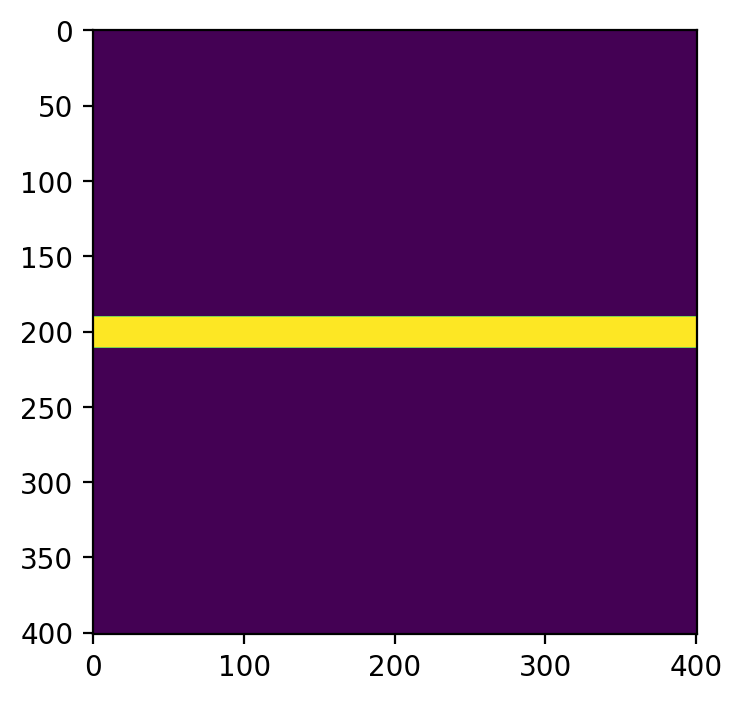

In [3]:
plt.figure(dpi = 200)
plt.imshow((yy <= 1) * (yy >= -1))

In [6]:
radius = 10.0
center_x = radius
center_y = 0.0

def vector_transform(xx, yy):
    r = np.sqrt((xx - center_x) ** 2 + (yy - center_y) ** 2)
    if center_x > 0:
        x1 = center_x - xx
    else:
        x1 = xx - center_x
    y1 = yy - center_y
    alpha = np.arctan2(y1, x1)
    l = alpha * r
    if center_x > 0:
        return center_x - r, center_y + l
    else:
        return center_x + r, center_y + l

def transform_coordinates(x, y):
    x = float(x)
    y = float(y)
    r = radius - x + np.random.rand() * 1e-4
    alpha = y / r
    dy = r * np.sin(alpha) - y
    dx = r - r * np.cos(alpha)
    return dx, dy

def transform_inverse(x, y):
    r = np.sqrt((x - center_x) ** 2 + (y - center_y) ** 2)
    x1 = center_x - x
    y1 = center_y - y
    alpha = np.arctan2(y1, x1)
    l = alpha / (2 * np.pi) * r
    if center_x > 0:
        return center_x - r, center_y + l
    else:
        return center_x + r, center_y + l

def elementwise(xx, yy, f):
    dxx = np.zeros_like(xx)
    dyy = np.zeros_like(yy)
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            dxx[i][j], dyy[i][j] = f(xx[i][j], yy[i][j])
    return dxx, dyy
            
def result_transform(x, y):
    dx, dy = transform_coordinates(x, y)
    return x + dx, y + dy

def result_transform_inv(x, y):
    dx, dy = transform_coordinates(x, y)
    return x - dx, y - dy

nxx, nyy = vector_transform(xx, yy)

# p = (0, np.pi * 3/4 * radius)
# print(result_transform(*p))
# print(transform_coordinates(*p))
# dxx, dyy = elementwise(xx, yy, transform_inverse)
# nxx = dxx
# nyy = dyy

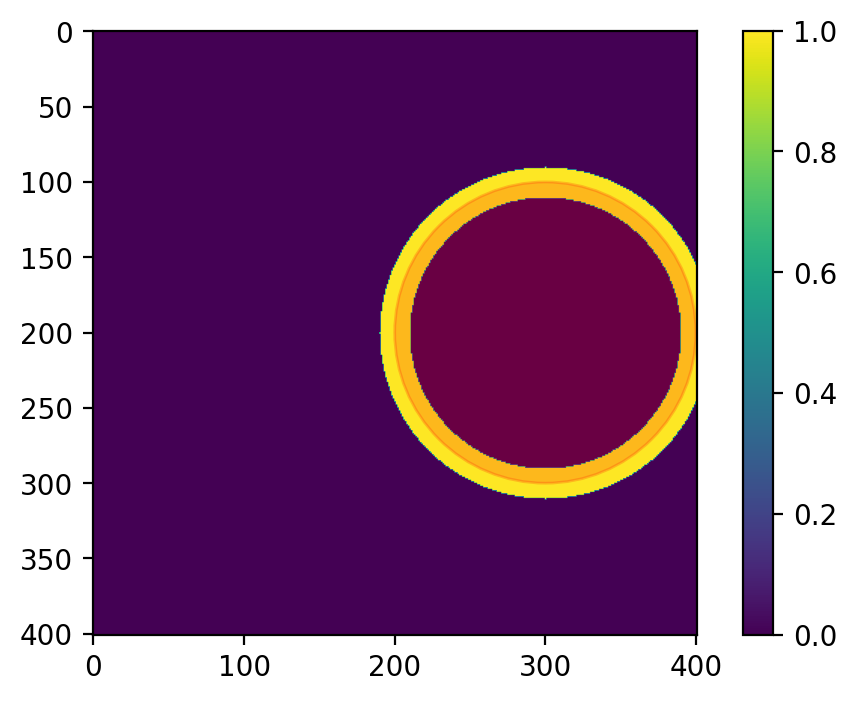

In [8]:
def plot(xx, yy):
    plt.figure(dpi = 200)
#     values = [1, -1]
#     maps = np.zeros_like(yy)
#     eps = 0.2
#     for v in values:
#         maps += (yy >= (v - eps)) * (yy <= (v + eps))
#     plt.imshow(maps)

    plt.imshow((xx <= 1) * (xx >= -1))
    plt.colorbar()

    circle = plt.Circle((300, 200), 100, color='r', alpha=0.2)
    ax = plt.gca()
    ax.set_aspect('equal')
    ax.add_artist(circle)

plot(nxx, nyy)

In [723]:
print(nxx[1])

[-26.36167153 -26.28136031 -26.20117488 -26.12110185 -26.04114707
 -25.9613265  -25.88161907 -25.8020231  -25.7225595  -25.64322388
 -25.56400284 -25.48491017 -25.40593415 -25.32709294 -25.24839636
 -25.16980963 -25.09135837 -25.0130452  -24.93485284 -24.85681663
 -24.77889434 -24.7011224  -24.62349238 -24.54598597 -24.46861569
 -24.39140083 -24.31432612 -24.23740919 -24.1606123  -24.08398491
 -24.00748977 -23.9311405  -23.85494043 -23.77889837 -23.70302716
 -23.62729038 -23.55171539 -23.4762709  -23.40103    -23.32591365
 -23.25096133 -23.17619516 -23.10157    -23.02713713 -22.95285044
 -22.87873596 -22.80478304 -22.73099261 -22.65740722 -22.58397762
 -22.51072358 -22.43763729 -22.36474033 -22.29203452 -22.2195154
 -22.14714865 -22.07498761 -22.00301557 -21.93121411 -21.85963095
 -21.78822391 -21.71699617 -21.64597073 -21.57515136 -21.50454956
 -21.43411035 -21.36390478 -21.29388451 -21.22408079 -21.15446099
 -21.08505938 -21.01587615 -20.94692312 -20.87816077 -20.80962063
 -20.741303

In [736]:
k = np.searchsorted(nxx[0], 0)
print(nxx[0][k])

0.46872222637462


In [725]:
def check_values():
    nx, ny = nxx[0][256], nyy[0][256]
    x, y = xx[0][256], yy[0][256]
    dx, dy = dxx[0][256], dyy[0][256]
    print(x, y)
    print(nx, ny)
    print(dx, dy)
check_values()

5.600000000000001 20.0
0.46872222637462 44.33884167373867
5.131277773625381 -24.33884167373867


In [753]:
def transform_coordinates_debug(x, y):
    x = float(x)
    y = float(y)
    r = radius - x + np.random.rand() * 1e-4
    print(r)
    alpha = y / r
    print(alpha)
    print(r * np.sin(alpha))
    print(r * np.cos(alpha))
    dy = r * np.sin(alpha) - y
    dx = r - r * np.cos(alpha)
    return dx, dy

p = (5.6, 20)

print('original', transform_coordinates_debug(*p))
print('target', result_transform(*p))
tx, ty = result_transform(*p)
print(np.sqrt((tx - 10) ** 2 + (ty) ** 2))

4.400017425546983
4.545436543927715
-4.338838629312587
-0.7311858135262
original (5.131203239073183, -24.338838629312587)
target (10.731428209693494, -4.338847815986647)
4.400023222122251


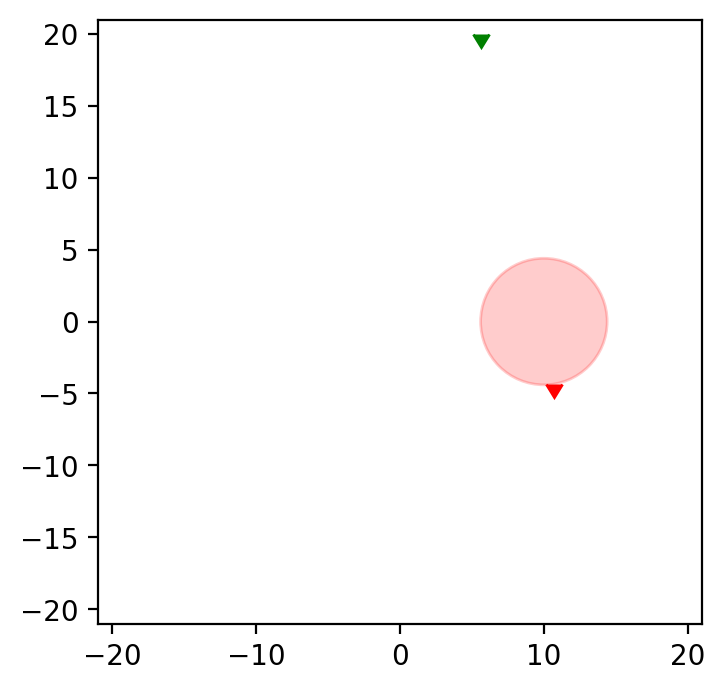

In [754]:
plt.figure(dpi=200)
plt.plot(p[0], p[1], marker=11, c='g')
plt.plot(tx, ty, marker=11, c='r')
plt.xlim([-21, 21])
plt.ylim([-21, 21])

circle = plt.Circle((10, 0), 4.4, color='r', alpha=0.2)
ax = plt.gca()
ax.add_artist(circle)
ax.set_aspect('equal')

In [755]:
print(p)

(5.6, 20)


In [756]:
nxx[0][k], nyy[0][k]

(0.4684581734506237, 44.33885245275805)

In [785]:
print(dxx[0][k], dyy[0][k])
print(xx[0][k] + dxx[0][k], yy[0][k] + dyy[0][k])
print(xx[0][k] - dxx[0][k], yy[0][k] - dyy[0][k])

5.131541826549378 -24.338852452758047
10.731541826549378 -4.338852452758047
0.4684581734506237 44.33885245275805


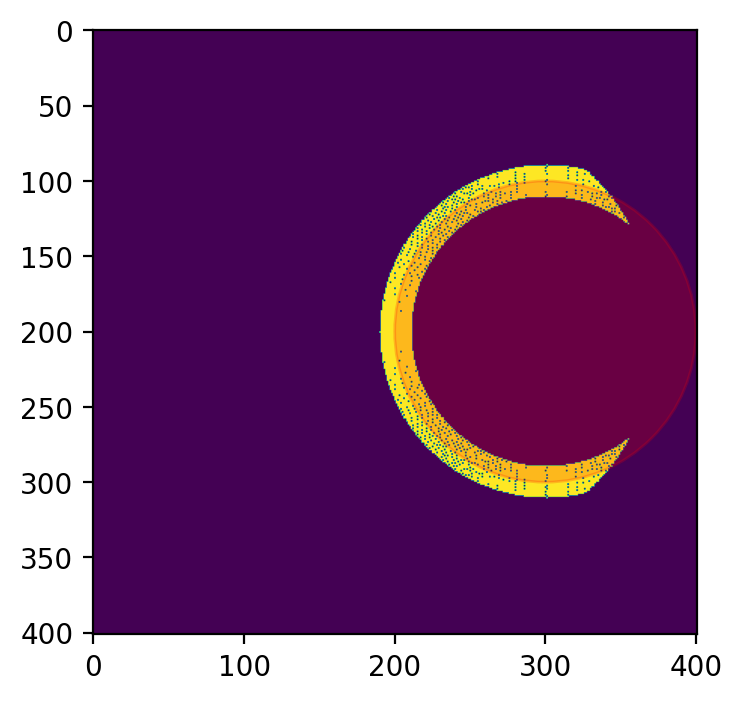

In [805]:
image = np.zeros_like(xx)
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        if xx[i][j] >= -1 and xx[i][j] <= 1:
            x, y = result_transform(xx[i][j], yy[i][j])
            jj = np.searchsorted(xx[i], x)
            inv = np.arange(xx.shape[1] - 1, -1, -1)
            ii = inv[np.searchsorted(yy[:, j], y, sorter=np.arange(xx.shape[1] - 1, -1, -1))]
            image[ii][jj] = 1
        
plt.figure(dpi=200)
plt.imshow(image)
circle = plt.Circle((300, 200), 100, color='r', alpha=0.2)
ax = plt.gca()
ax.set_aspect('equal')
ax.add_artist(circle)

In [806]:
yy[:, 0]

array([ 20. ,  19.9,  19.8,  19.7,  19.6,  19.5,  19.4,  19.3,  19.2,
        19.1,  19. ,  18.9,  18.8,  18.7,  18.6,  18.5,  18.4,  18.3,
        18.2,  18.1,  18. ,  17.9,  17.8,  17.7,  17.6,  17.5,  17.4,
        17.3,  17.2,  17.1,  17. ,  16.9,  16.8,  16.7,  16.6,  16.5,
        16.4,  16.3,  16.2,  16.1,  16. ,  15.9,  15.8,  15.7,  15.6,
        15.5,  15.4,  15.3,  15.2,  15.1,  15. ,  14.9,  14.8,  14.7,
        14.6,  14.5,  14.4,  14.3,  14.2,  14.1,  14. ,  13.9,  13.8,
        13.7,  13.6,  13.5,  13.4,  13.3,  13.2,  13.1,  13. ,  12.9,
        12.8,  12.7,  12.6,  12.5,  12.4,  12.3,  12.2,  12.1,  12. ,
        11.9,  11.8,  11.7,  11.6,  11.5,  11.4,  11.3,  11.2,  11.1,
        11. ,  10.9,  10.8,  10.7,  10.6,  10.5,  10.4,  10.3,  10.2,
        10.1,  10. ,   9.9,   9.8,   9.7,   9.6,   9.5,   9.4,   9.3,
         9.2,   9.1,   9. ,   8.9,   8.8,   8.7,   8.6,   8.5,   8.4,
         8.3,   8.2,   8.1,   8. ,   7.9,   7.8,   7.7,   7.6,   7.5,
         7.4,   7.3,